
# Минипроект

В этом минипроекте необходимо проанализировать данные из Google Play Store.


**Описание данных**
```
App — название приложения
Category — категория, к которой относится приложение
Rating — рейтинг пользователей
Reviews — количество отзывов пользователей о приложении
Size — размер приложения
Installs — количество загрузок/установок приложения пользователями
Type — платное или бесплатное приложение
Price — цена приложения
Content Rating — возрастная группа, на которую ориентировано приложение
Genres — принадлежность приложения к нескольким жанрам
Last Updated — дата последнего обновления приложения в Play Store
Current Ver — текущая версия приложения в Play Store
Android Ver — минимальная требуемая версия Android
```

## 1

Сохраните в переменные data_head и data_tail первые и последние 3 строки из датафрейма соответственно.

Датафрейм уже находится в переменной playstore.

In [201]:
import pandas as pd

playstore = pd.read_csv('playstore.csv')

In [202]:
data_head = playstore.head(3)
data_tail = playstore.tail(3)
data_head

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 2
Сохраните в переменные n_col и n_row количество столбцов и строк в датафрейме соответственно.

Датафрейм уже находится в переменной playstore.

In [203]:
n_col = playstore.shape[1]
n_row = playstore.shape[0]

print(f'{n_col} {n_row}')

14 10840


In [204]:
# можно было  проще
cols, rows = playstore.shape
print(f'{rows} {cols}')

14 10840


## 3

Давайте теперь посмотрим, какое количество уникальных приложений есть в наших данных (колонка App).

В качестве ответа введите полученное число.

In [205]:
playstore.App.nunique()

9659

## 4

Давайте посчитаем число пропущенных значений в колонке с рейтингом приложений.

Сохраните в переменную rating_missing количество пропущенных значений в колонке Rating. 

Датафрейм уже находится в переменной playstore.

In [206]:
rating_missing = playstore.Rating.isnull().sum()

In [207]:
playstore.Rating.notna().sum() # сколько не null

9366

## 5

Научимся объединять датафреймы и познакомимся с функцией concat.\
https://pandas.pydata.org/docs/reference/api/pandas.concat.html

- Допустим, мы хотим собрать датафрейм, который будет включать в себя: 
    - первые три строки исходного датафрейма, 
    - строки 6-8 (включительно), 
    - строки 16-19 (включительно) 
    - и колонки: App, Size, Genres, Current Ver в соответствующем порядке.

- По сути, это будет выглядеть как объединение трех, состоящих из нескольких строк, датафреймов, являющимися срезами из исходных данных.

- В качестве ответа загрузите полученный датафрейм в формате csv. При сохранении финального датафрейма, колонка с индексами должна остаться.

> NB! Помните про индексацию с нуля и правила включения/невключения границ при слайсинге

In [208]:
s1 = playstore[:3].copy()
s2 = playstore[5:8].copy()
s3 = playstore[15:19].copy()

In [209]:
playstore_concat = pd.concat([s1, s2, s3])[['App', 'Size', 'Genres', 'Current Ver']]

In [210]:
playstore_concat.to_csv('05_Pandas_miniproject_task5.csv')

In [211]:
!cat 05_Pandas_miniproject_task5.csv

,App,Size,Genres,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,19M,Art & Design,1.0.0
1,Coloring book moana,14M,Art & Design;Pretend Play,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",8.7M,Art & Design,1.2.4
5,Paper flowers instructions,5.6M,Art & Design,1.0
6,Smoke Effect Photo Maker - Smoke Editor,19M,Art & Design,1.1
7,Infinite Painter,29M,Art & Design,6.1.61.1
15,Learn To Draw Kawaii Characters,2.7M,Art & Design,
16,Photo Designer - Write your name with shapes,5.5M,Art & Design,3.1
17,350 Diy Room Decor Ideas,17M,Art & Design,1.0
18,FlipaClip - Cartoon animation,39M,Art & Design,2.2.5


In [ ]:
# а если проще (эталон): 

# отберем нужные строки датафрейма
temp = pd.concat([playstore[:3], playstore[5:8], playstore[15:19]])

# отберем нужные колонки
result = temp[["App", "Size", "Genres", "Current Ver"]]

# сохраним результат
result.to_csv("5_result.csv")

## 6

Для дальнейшего анализа нам необходимо 
- убрать дубликаты приложений (колонка App) 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
- и сбросить индекс. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
- Сохраните полученный результат в виде датафрейма в переменную unique_playstore. 

Датафрейм уже находится в переменной playstore.

In [212]:
"""
Для того чтобы убрать дубликаты из нашего датафрейма,
воспользуемся методом .drop_duplicates(), также добавим туда параметр subset,
который нам поможет выбрать колонку по которой удаляем дубликаты. 
Для того чтобы сбросить индекс, нам нужно воспользоваться методом .reset_index() 
и добавить параметр drop=True, это позволит нам избежать 
добавление старых индексов как колонок датафрейма.
"""

unique_playstore = playstore.drop_duplicates(subset=['App']).reset_index(drop=True)

## 7

В этом задании названия колонок необходимо привести к стандартному виду — все буквы должны быть нижнего регистра, а пробелы должны быть заменены на нижние подчеркивания. 

Методы, которые могут пригодиться:

rename\
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html 

str.lower\
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html?highlight=lower#pandas.Series.str.lower 

str.replace\
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html#pandas.Series.str.replace

columns\
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns

Данные уже сохранены в playstore. 

In [213]:
playstore.columns = playstore.columns.str.lower().str.replace(' ', '_')

In [214]:
playstore.columns

Index(['unnamed:_0', 'app', 'category', 'rating', 'reviews', 'size',
       'installs', 'type', 'price', 'content_rating', 'genres', 'last_updated',
       'current_ver', 'android_ver'],
      dtype='object')

## 8

- Давайте посмотрим на долю платных и бесплатных приложений. 
- В качестве ответа введите долю бесплатных приложений.
- Ответ округлите до сотых, в качестве десятичного разделителя используйте точку.

NB! Не забудьте убрать дубликаты перед подсчетом доли!

In [215]:
# round(playstore.drop_duplicates(subset=['app']).type.value_counts() / len(playstore.drop_duplicates(subset=['app'])),2)
playstore.drop_duplicates(subset=['app']).type.value_counts(normalize=True).round(2)[0]

0.92

## 9

- Отберите из датафрейма только те приложения, которые относятся к образовательной категории  (EDUCATION) 
- и с количеством отзывов пользователей более 1000. 
- Сохраните новый датафрейм в переменную education_playstore.
- NB! Не забудьте сбросить индекс в полученном датафрейме!

In [216]:
playstore = unique_playstore.copy()
playstore.columns = playstore.columns.str.lower().str.replace(' ', '_')
education_playstore = playstore[(playstore['category'] == 'EDUCATION') & (playstore['reviews'] > 1000)].reset_index(drop=True)
education_playstore

,unnamed:_0,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
1,700,TED,EDUCATION,4.6,181893,18M,"10,000,000+",Free,0,Everyone 10+,Education,"July 27, 2018",3.2.5,4.1 and up
2,701,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18M,"100,000+",Free,0,Everyone,Education,"December 29, 2017",3.1,4.0 and up
3,702,Khan Academy,EDUCATION,4.6,85375,21M,"5,000,000+",Free,0,Everyone,Education,"July 27, 2018",5.0.0,4.1 and up
4,703,Learn English with Wlingua,EDUCATION,4.7,314299,3.3M,"10,000,000+",Free,0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,848,SoloLearn: Learn to Code for Free,EDUCATION,4.8,256079,7.6M,"1,000,000+",Free,0,Teen,Education,"July 12, 2018",2.2.4,4.0.3 and up
94,849,Kids Learn Languages by Mondly,EDUCATION,4.4,2078,Varies with device,"100,000+",Free,0,Everyone,Education;Education,"December 24, 2017",1.0.2,4.1 and up
95,850,Blinkist - Nonfiction Books,EDUCATION,4.1,16103,13M,"1,000,000+",Free,0,Everyone,Education,"July 31, 2018",5.7.1,4.1 and up
96,853,Toca Life: City,EDUCATION,4.7,31085,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up


## 10
- Давайте уберем лишние символы из колонки с ценой (price), чтобы далее с ней было удобнее работать,
- и переведем данные в тип float. 

Данные уже сохранены в playstore.

In [217]:
playstore['price'] = playstore['price'].str.replace('$', '').astype(float)
playstore.head(3)

/tmp/ipykernel_4964/2168220280.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore['price'] = playstore['price'].str.replace('$', '').astype(float)


,unnamed:_0,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# эталонный вариант с lambda

playstore["price"] = playstore.price.apply(lambda x:x.replace('$','')).astype("float")

## 11

В качестве последнего задания вам предстоит сделать сводную таблицу по данным. Полученная на выходе таблица должна соответствовать представленному шаблону: 

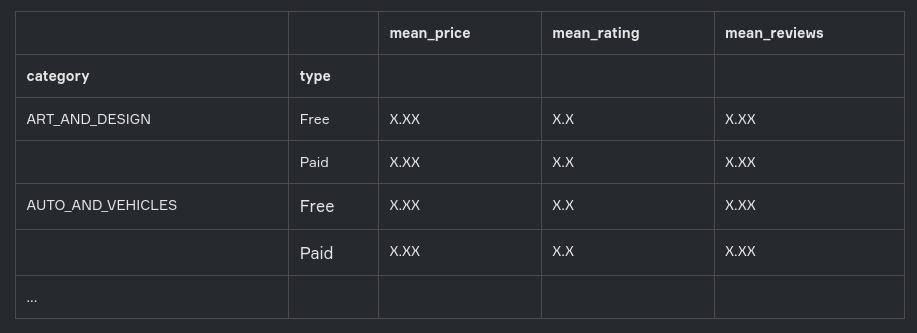

- Колонки должны иметь соответствующие названия, 
- значения таблицы округлены до указанного числа знаков после точки. 
- В качестве ответа загрузите полученную таблицу в формате csv (сепаратор запятая - ,).

- NB! Понадобится погуглить информацию по запросу "Сводная таблица pandas"

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

- NB! Таблицу нужно делать по данным, где удалены дубликаты

In [218]:
pivot_ps = pd.pivot_table(playstore, index=['category', 'type'], values=['price', 'rating', 'reviews']
)

In [223]:
pivot_ps.rename(columns={'price': 'mean_price', 
                         'rating': 'mean_rating',
                         'reviews': 'mean_reviews'})

mean_price  mean_rating   mean_reviews
category          type                                        
ART_AND_DESIGN    Free      0.0000     4.337931   23230.114754
                  Paid      1.9900     4.733333     722.000000
AUTO_AND_VEHICLES Free      0.0000     4.184722   14140.280488
                  Paid      4.4900     4.600000    1387.666667
BEAUTY            Free      0.0000     4.278571    7476.226415
...                            ...          ...            ...
TRAVEL_AND_LOCAL  Paid      4.1625     4.100000    1506.083333
VIDEO_PLAYERS     Free      0.0000     4.043056  424347.176101
                  Paid      2.6150     4.100000    3341.750000
WEATHER           Free      0.0000     4.229231  171249.619718
                  Paid      4.0525     4.371429   17055.125000

[63 rows x 3 columns]

In [229]:
pivot_ps['mean_price'] = pivot_ps['mean_price'].round(2)

In [226]:
pivot_ps

mean_price  mean_rating   mean_reviews
category          type                                        
ART_AND_DESIGN    Free      0.0000     4.337931   23230.114754
                  Paid      1.9900     4.733333     722.000000
AUTO_AND_VEHICLES Free      0.0000     4.184722   14140.280488
                  Paid      4.4900     4.600000    1387.666667
BEAUTY            Free      0.0000     4.278571    7476.226415
...                            ...          ...            ...
TRAVEL_AND_LOCAL  Paid      4.1625     4.100000    1506.083333
VIDEO_PLAYERS     Free      0.0000     4.043056  424347.176101
                  Paid      2.6150     4.100000    3341.750000
WEATHER           Free      0.0000     4.229231  171249.619718
                  Paid      4.0525     4.371429   17055.125000

[63 rows x 3 columns]

In [227]:
pivot_ps['mean_rating'] = pivot_ps['mean_rating'].round(1)

In [228]:
pivot_ps

mean_price  mean_rating   mean_reviews
category          type                                        
ART_AND_DESIGN    Free      0.0000          4.3   23230.114754
                  Paid      1.9900          4.7     722.000000
AUTO_AND_VEHICLES Free      0.0000          4.2   14140.280488
                  Paid      4.4900          4.6    1387.666667
BEAUTY            Free      0.0000          4.3    7476.226415
...                            ...          ...            ...
TRAVEL_AND_LOCAL  Paid      4.1625          4.1    1506.083333
VIDEO_PLAYERS     Free      0.0000          4.0  424347.176101
                  Paid      2.6150          4.1    3341.750000
WEATHER           Free      0.0000          4.2  171249.619718
                  Paid      4.0525          4.4   17055.125000

[63 rows x 3 columns]

In [230]:
pivot_ps['mean_reviews'] = pivot_ps.mean_reviews.round(2)

In [231]:
pivot_ps

mean_price  mean_rating  mean_reviews
category          type                                       
ART_AND_DESIGN    Free        0.00          4.3      23230.11
                  Paid        1.99          4.7        722.00
AUTO_AND_VEHICLES Free        0.00          4.2      14140.28
                  Paid        4.49          4.6       1387.67
BEAUTY            Free        0.00          4.3       7476.23
...                            ...          ...           ...
TRAVEL_AND_LOCAL  Paid        4.16          4.1       1506.08
VIDEO_PLAYERS     Free        0.00          4.0     424347.18
                  Paid        2.62          4.1       3341.75
WEATHER           Free        0.00          4.2     171249.62
                  Paid        4.05          4.4      17055.12

[63 rows x 3 columns]

In [232]:
pivot_ps.to_csv('05_Pandas_miniproject_task11.csv', sep=',')

/home/antonio/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [233]:
!cat 05_Pandas_miniproject_task11.csv

category,type,mean_price,mean_rating,mean_reviews
ART_AND_DESIGN,Free,0.0,4.3,23230.11
ART_AND_DESIGN,Paid,1.99,4.7,722.0
AUTO_AND_VEHICLES,Free,0.0,4.2,14140.28
AUTO_AND_VEHICLES,Paid,4.49,4.6,1387.67
BEAUTY,Free,0.0,4.3,7476.23
BOOKS_AND_REFERENCE,Free,0.0,4.3,86183.08
BOOKS_AND_REFERENCE,Paid,4.28,4.3,64.14
BUSINESS,Free,0.0,4.1,24179.2
BUSINESS,Paid,14.61,4.1,2094.33
COMICS,Free,0.0,4.2,41822.7
COMMUNICATION,Free,0.0,4.1,992108.17
COMMUNICATION,Paid,3.08,4.1,3119.04
DATING,Free,0.0,4.0,21951.13
DATING,Paid,4.57,3.4,268.0
EDUCATION,Free,0.0,4.4,115908.72
EDUCATION,Paid,4.49,4.8,8661.25
ENTERTAINMENT,Free,0.0,4.1,347526.41
ENTERTAINMENT,Paid,3.99,4.6,5004.5
EVENTS,Free,0.0,4.4,2555.84
EVENTS,Paid,109.99,,0.0
FAMILY,Free,0.0,4.2,85068.52
FAMILY,Paid,13.11,4.3,19850.12
FINANCE,Free,0.0,4.1,38533.26
FINANCE,Paid,170.64,3.8,1364.59
FOOD_AND_DRINK,Free,0.0,4.2,57469.37
FOOD_AND_DRINK,Paid,4.24,4.4,1698.5
GAME,Free,0.0,4.2,707783.19
GAME,Paid,3.47,4.4,19181.11
HEALTH_AND_FITNESS,Free,0.0,4

In [ ]:
# эталон: 

result = pd.pivot_table(playstore, values=['reviews', 'rating', 'price'], index=['category', 'type'],
                    aggfunc={'rating': np.mean,
                            'reviews': np.mean,
                            'price': np.mean}).\
                    rename(columns={'reviews': 'mean_reviews',
                                    'rating': 'mean_rating',
                                    'price': 'mean_price'})